On this program I describe some business courses from a dataset at Kaggle ( file available at https://www.kaggle.com/datasets/thedevastator/udemy-courses-revenue-generation-and-course-anal).

- 1191 courses launched between 06/27/2012 and 07/06/2017.
- Most courses were launched on Mondays (240 courses or 20%), Saturdays were the days with least courses launched (63 courses or 5%).
- March and May are the months where most courses were launched (123 courses or 10% each). There was a decrease in the release of new courses during summer months in the northern hemisphere, starting in July and decreasing until September. 

The top 10% business courses on Udemy related to number of subscribers:
- have between 3775 and 65576 subscribers. 
- last from 0.5 to 16 hours, mostly between 1 and 2 hours. 68% of the courses last less than 3.1 hours (the average duration of the top 10% courses) and 84% less than 5 hours, meaning that people prefer short courses than longer ones.  
- their price average is 67 ($ \pm $ 74) dolars
- only 2 courses were listed as 'Expert Level', while 70 were listed as 'All levels'. 
- as expected, free courses have more subscribers.
- courses that cost more than 100 dolars tend to last longer than free courses. 

About specific courses:
- The word "Trading" was the most used in the titles of the courses (appears in 254 of them).
- Most of courses (74%) last 3 or less hours.
- 91% of the courses have maximum 5000 subscribers. 
- free courses also tend to be shorter than paid courses.
- courses with bad rating also have many subscribers (for example 'Black Algo Trading: Build Your Trading Robot' has a rating of 0.21 and 20195 subscribers!!!) 

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Open and view file

In [2]:
# file available at https://www.kaggle.com/datasets/thedevastator/udemy-courses-revenue-generation-and-course-anal
path=('C:/Users/Mendes/Python tests/')
udemi_raw = pd.read_csv(path+'3.1-data-sheet-udemy-courses-business-courses.csv')
udemi=udemi_raw.copy()

#visualize the file
udemi.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance


In [3]:
udemi=udemi.drop(['course_id','subject','url'],axis=1)
udemi.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp
0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z
1,Accounting in 60 Minutes - A Brief Introduction,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z
2,Stock Market Investing for Beginners,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z
3,Introduction to Financial Modeling,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z
4,The Complete Financial Analyst Course 2017,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z


Are there missing values? If so, do they make difference?

In [4]:
udemi.isnull().sum()

course_title           1
price                  1
num_subscribers        1
num_reviews            1
num_lectures           1
level                  1
Rating                 0
content_duration       1
published_timestamp    1
dtype: int64

In [5]:
udemi_nona=udemi.dropna(axis=0)

In [6]:
len(udemi_nona)

1191

In [7]:
udemi_nona = udemi_nona.reset_index(drop=True)
udemi_nona.describe()

,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,68.694374,1569.026868,63.729639,32.462636,0.690353,3.557697
std,64.439371,3918.394281,236.208555,45.512784,0.297227,5.673457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,59.000000,3.000000,13.000000,0.470000,1.000000
50%,45.000000,486.000000,12.000000,22.000000,0.800000,2.000000
75%,95.000000,1617.000000,38.000000,36.000000,0.950000,4.000000
max,200.000000,65576.000000,4397.000000,544.000000,1.000000,71.500000


In [8]:
udemi_nona.dtypes

course_title            object
price                  float64
num_subscribers        float64
num_reviews            float64
num_lectures           float64
level                   object
Rating                 float64
content_duration       float64
published_timestamp     object
dtype: object

## Dealing with Date

In [9]:
udemi_nona['published_timestamp']

0       2013-04-20T02:25:22Z
1       2013-04-07T21:39:25Z
2       2013-12-25T19:53:34Z
3       2014-05-27T16:22:16Z
4       2016-01-21T01:38:48Z
                ...         
1186    2016-07-27T21:07:46Z
1187    2017-06-28T21:55:29Z
1188    2017-02-08T22:15:56Z
1189    2017-06-29T23:20:10Z
1190    2017-06-28T16:05:51Z
Name: published_timestamp, Length: 1191, dtype: object

In [10]:
udemi_nona['published_timestamp']=pd.to_datetime(udemi_nona['published_timestamp'])

In [11]:
print(min(udemi_nona['published_timestamp']))
print(max(udemi_nona['published_timestamp']))

2012-06-27 16:41:09+00:00
2017-07-06 21:46:30+00:00


I want to see if there is a day of the week or month where most courses are launched.

In [12]:
def date_to_weekday(date_value):
 return date_value.weekday()

udemi_nona['day_week']=udemi_nona['published_timestamp'].apply(date_to_weekday)

[]

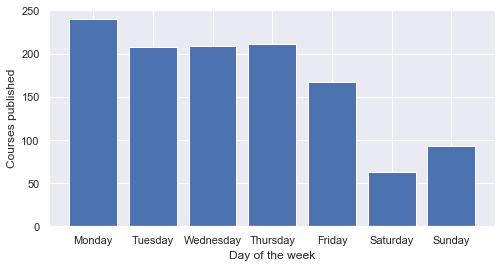

In [13]:
week=udemi_nona['day_week'].value_counts()
week.index = week.index.astype(int)
week_order = week.sort_index()

bars=('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.figure(figsize=(8, 4))
plt.bar(x_pos, week_order)

plt.ylabel('Courses published')
plt.xlabel('Day of the week')
plt.xticks(x_pos, bars)
plt.plot()

In [14]:
list_months=[]
for i in range (len(udemi_nona)):
 list_months.append(udemi_nona['published_timestamp'][i].month)

In [15]:
udemi_nona['month_value']=list_months

[]

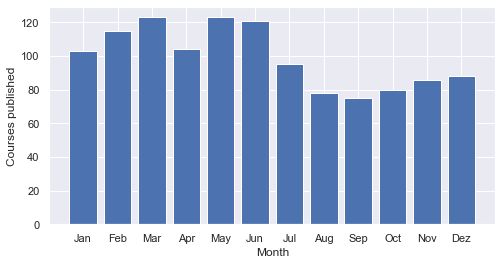

In [16]:
month=udemi_nona['month_value'].value_counts()

month.index = month.index.astype(int)
month_order = month.sort_index()

bars=('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dez')
x_pos = np.arange(len(bars))

plt.figure(figsize=(8, 4))
plt.bar(x_pos, month_order)

plt.ylabel('Courses published')
plt.xlabel('Month')
plt.xticks(x_pos, bars)
plt.plot()

In [ ]:
udemi_nona=udemi_nona.drop(['day_week','month_value'],axis=1)
udemi_nona = udemi_nona.reset_index(drop=True)

## Let's have a look on the top 10% courses on number of subscribers

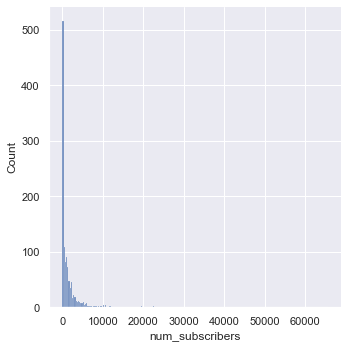

In [17]:
sns.displot(udemi_nona['num_subscribers'])

In [18]:
q = udemi_nona['num_subscribers'].quantile(0.9)
udemi_top = udemi_nona[udemi_nona['num_subscribers']>q]

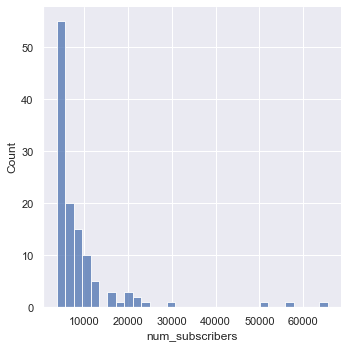

In [19]:
sns.displot(udemi_top['num_subscribers'])

In [20]:
udemi_tops = udemi_top.reset_index(drop=True)
udemi_tops.describe()

,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration,day_week,month_value
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,67.521008,8997.478992,394.403361,32.462185,0.577815,3.107423,2.537815,5.941176
std,73.826623,9266.842549,640.601073,33.708569,0.294860,2.794491,1.764960,3.400633
min,0.000000,3775.000000,2.000000,5.000000,0.020000,0.516667,0.000000,1.000000
25%,0.000000,4678.000000,53.500000,14.000000,0.290000,1.000000,1.000000,3.000000
50%,30.000000,5931.000000,154.000000,22.000000,0.720000,2.000000,3.000000,5.000000
75%,125.000000,9464.000000,479.000000,38.500000,0.810000,4.250000,4.000000,9.000000
max,200.000000,65576.000000,4397.000000,227.000000,0.990000,16.000000,6.000000,12.000000


In [21]:
udemi_tops['level'].value_counts()

All Levels            70
Beginner Level        33
Intermediate Level    14
Expert Level           2
Name: level, dtype: int64

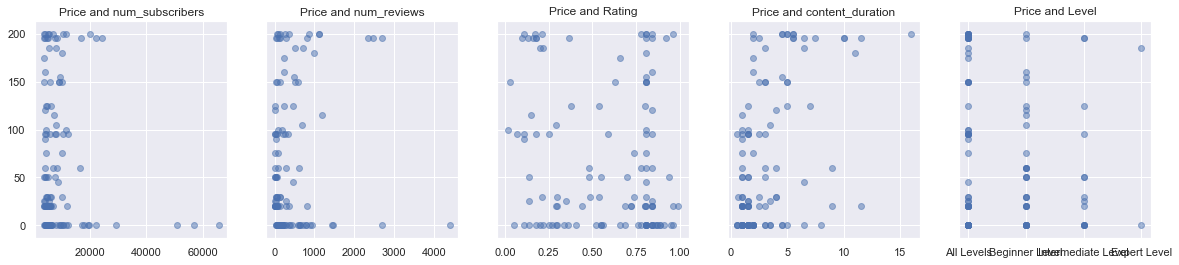

In [56]:
f, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(1, 5, sharey=True, figsize=(20,4))
ax1.scatter(udemi_tops['num_subscribers'],udemi_tops['price'],alpha=0.5)
ax1.set_title('Price and num_subscribers')
#plt.ylabel('Price')
ax2.scatter(udemi_tops['num_reviews'],udemi_tops['price'],alpha=0.5)
ax2.set_title('Price and num_reviews')
ax3.scatter(udemi_tops['Rating'],udemi_tops['price'],alpha=0.5)
ax3.set_title('Price and Rating')
ax4.scatter(udemi_tops['content_duration'],udemi_tops['price'],alpha=0.5)
ax4.set_title('Price and content_duration')
ax5.scatter(udemi_tops['level'],udemi_tops['price'],alpha=0.5)
ax5.set_title('Price and Level')

plt.show()

In [23]:
for i in range (len(udemi_tops)):
 if udemi_tops['level'][i] == 'Expert Level':
      print('Course = ',udemi_tops['course_title'][i],
            'Price = $',udemi_tops['price'][i],
            'Rating = ',udemi_tops['Rating'][i],
           'Number of subscribers = ',udemi_tops['num_subscribers'][i],
           'Duration = ',udemi_tops['content_duration'][i])

Course =  Hedge Fund Trading System Price = $ 0.0 Rating =  0.81 Number of subscribers =  8985.0 Duration =  1.0
Course =  Algorithmic Trading In Forex: Create Your First Forex Robot! Price = $ 185.0 Rating =  0.22 Number of subscribers =  7941.0 Duration =  6.5


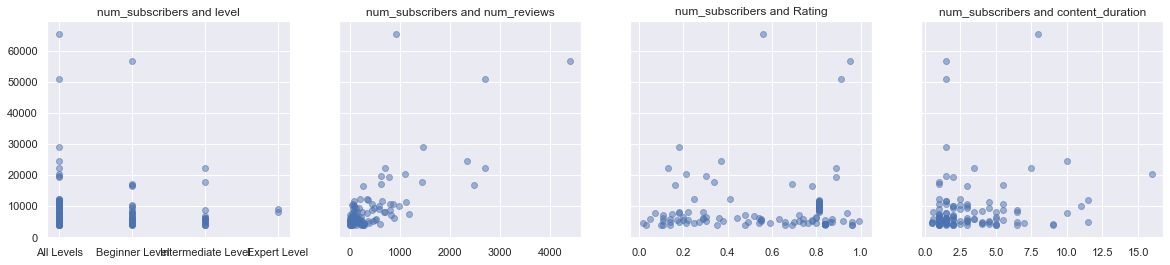

In [57]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(20,4))
ax1.scatter(udemi_tops['level'],udemi_tops['num_subscribers'],alpha=0.5)
ax1.set_title('num_subscribers and level')
ax2.scatter(udemi_tops['num_reviews'],udemi_tops['num_subscribers'],alpha=0.5)
ax2.set_title('num_subscribers and num_reviews')
ax3.scatter(udemi_tops['Rating'],udemi_tops['num_subscribers'],alpha=0.5)
ax3.set_title('num_subscribers and Rating')
ax4.scatter(udemi_tops['content_duration'],udemi_tops['num_subscribers'],alpha=0.5)
ax4.set_title('num_subscribers and content_duration')

plt.show()

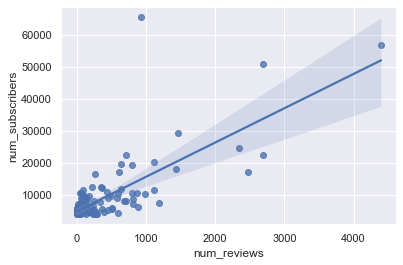

In [25]:
sns.regplot(x=udemi_tops['num_reviews'], y=udemi_tops['num_subscribers'])

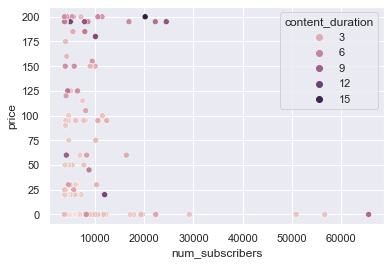

In [26]:
sns.scatterplot(y=udemi_tops['price'], x=udemi_tops['num_subscribers'], hue=udemi_tops['content_duration'])

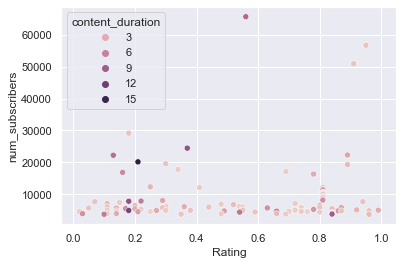

In [27]:
sns.scatterplot(x=udemi_tops['Rating'], y=udemi_tops['num_subscribers'], hue=udemi_tops['content_duration'])

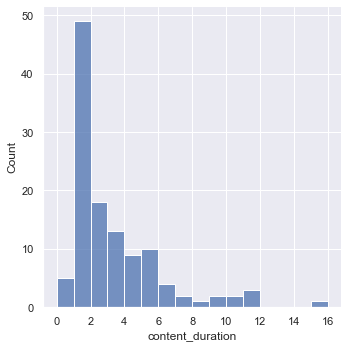

In [28]:
y_len=np.arange(17)
sns.displot(udemi_tops['content_duration'],bins=y_len)

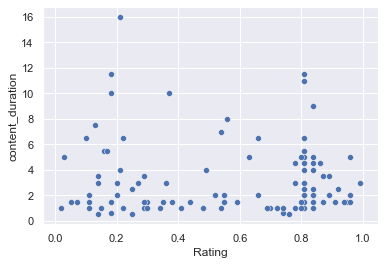

In [29]:
sns.scatterplot(y=udemi_tops['content_duration'], x=udemi_tops['Rating'])

In [72]:
mean_duration=3.10

In [73]:
Duration=np.where(udemi_tops['content_duration']>mean_duration, 'Long','Short')

In [74]:
udemi_tops['Duration']=Duration

In [75]:
udemi_tops.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,day_week,month_value,Duration
0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20 02:25:22+00:00,5,4,Long
1,Accounting in 60 Minutes - A Brief Introduction,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07 21:39:25+00:00,6,4,Short
2,Stock Market Investing for Beginners,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25 19:53:34+00:00,2,12,Short
3,Introduction to Financial Modeling,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27 16:22:16+00:00,1,5,Short
4,The Complete Financial Analyst Course 2017,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21 01:38:48+00:00,3,1,Long


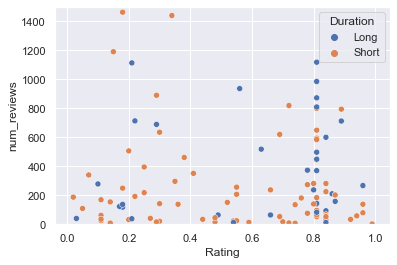

In [76]:
sns.scatterplot(y=udemi_tops['num_reviews'], x=udemi_tops['Rating'], hue=udemi_tops['Duration'])
plt.ylim(0, 1500)
#plt.xlim(3000, 25000)
plt.show()

In [70]:
udemi_tops['Duration'].value_counts()

Short    100
Long      19
Name: Duration, dtype: int64

In [71]:
100/119

0.8403361344537815

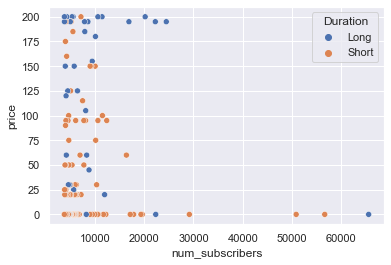

In [37]:
sns.scatterplot(y=udemi_tops['price'], x=udemi_tops['num_subscribers'], hue=udemi_tops['Duration'])

## Specific course

First I'll find what is the word most found on the titles.

In [38]:
out=udemi_nona['course_title'].str.split()
out = out.explode()
out.value_counts()

Trading    253
to         210
-          170
for        153
Forex      147
          ... 
durch        1
per          1
Skills!      1
thru         1
Plays!       1
Name: course_title, Length: 2291, dtype: int64

Most courses are about Trading. Let's check on that.

In [39]:
count_trading=udemi_nona.course_title.map(lambda desc: "Trading" in desc).sum()
descriptor_counts = pd.Series([count_trading], index=['Trading'])
descriptor_counts

Trading    254
dtype: int64

In [77]:
udemi_trading=udemi_nona[udemi_nona['course_title'].map(lambda desc: "Trading" in desc)==True]
udemi_trading = udemi_trading.reset_index(drop=True)
udemi_trading.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,day_week,month_value
0,Black Algo Trading: Build Your Trading Robot,200.0,20195.0,1113.0,227.0,All Levels,0.21,16.0,2014-10-27 22:01:36+00:00,0,10
1,Fundamentals of Forex Trading,0.0,17160.0,620.0,23.0,Beginner Level,0.69,1.0,2014-08-29 20:10:38+00:00,4,8
2,Forex Trading A-Z™ - With LIVE Examples of For...,195.0,16900.0,2476.0,52.0,Beginner Level,0.16,5.5,2014-12-12 23:58:39+00:00,4,12
3,Learn to Trade for Profit:Trading with Japanes...,60.0,16385.0,273.0,45.0,Beginner Level,0.78,3.0,2014-09-02 03:53:13+00:00,1,9
4,Options Trading Introduction: Day Trade Stock ...,95.0,12394.0,218.0,30.0,All Levels,0.25,2.5,2015-02-20 21:39:41+00:00,4,2


In [41]:
udemi_trading.describe()

,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration,day_week,month_value
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,101.043307,1764.291339,72.594488,27.980315,0.680315,2.801050,2.366142,6.598425
std,71.243848,2962.576719,213.820001,23.099963,0.311033,2.800069,1.792550,3.490835
min,0.000000,0.000000,0.000000,4.000000,0.020000,0.133333,0.000000,1.000000
25%,40.000000,136.250000,8.000000,15.000000,0.410000,1.000000,1.000000,3.250000
50%,95.000000,768.000000,17.000000,23.000000,0.810000,2.000000,2.000000,7.000000
75%,190.000000,1767.500000,45.000000,35.000000,0.940000,3.500000,4.000000,10.000000
max,200.000000,20195.000000,2476.000000,227.000000,1.000000,20.500000,6.000000,12.000000


In [42]:
high_rate=np.where(udemi_trading['Rating']==udemi_trading['Rating'].max())[0][0]
print('The course with the highest rating is "',udemi_trading['course_title'][high_rate],'" whith rating =',udemi_trading['Rating'][high_rate],'reviewed by',udemi_trading['num_reviews'][high_rate],' subscribers and price = USS',udemi_trading['price'][high_rate])

The course with the highest rating is " Forex Trading: Your Complete Guide to Get Started Like a Pro " whith rating = 1.0 reviewed by 25.0  subscribers and price = USS 140.0


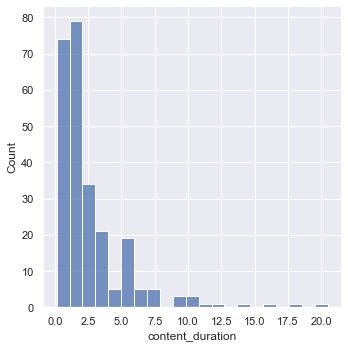

In [87]:
y_len=21
sns.displot(udemi_trading['content_duration'],bins=y_len)

In [108]:
sum_dur=0
for i in range (len(udemi_trading['content_duration'])):
    if udemi_trading['content_duration'][i]<=3.0:
        sum_dur=sum_dur+1
print(sum_dur/len(udemi_trading['content_duration']))        

0.7362204724409449


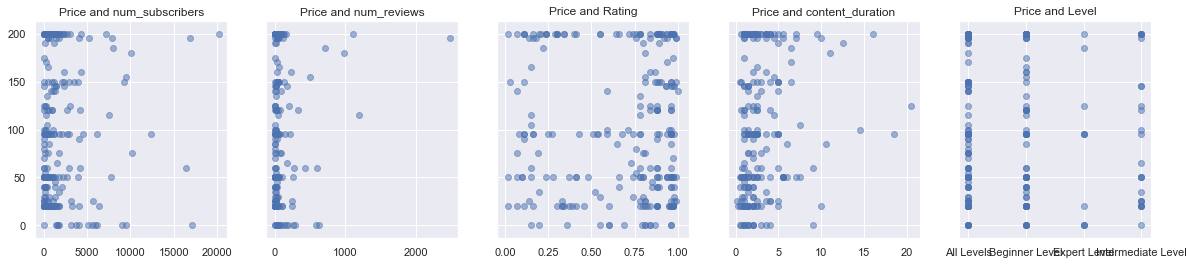

In [109]:
f, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(1, 5, sharey=True, figsize=(20,4))
ax1.scatter(udemi_trading['num_subscribers'],udemi_trading['price'],alpha=0.5)
ax1.set_title('Price and num_subscribers')
#plt.ylabel('Price')
ax2.scatter(udemi_trading['num_reviews'],udemi_trading['price'],alpha=0.5)
ax2.set_title('Price and num_reviews')
ax3.scatter(udemi_trading['Rating'],udemi_trading['price'],alpha=0.5)
ax3.set_title('Price and Rating')
ax4.scatter(udemi_trading['content_duration'],udemi_trading['price'],alpha=0.5)
ax4.set_title('Price and content_duration')
ax5.scatter(udemi_trading['level'],udemi_trading['price'],alpha=0.5)
ax5.set_title('Price and Level')

plt.show()

In [110]:
sum_dur=0
for i in range (len(udemi_trading['num_subscribers'])):
    if udemi_trading['num_subscribers'][i]<=5000:
        sum_dur=sum_dur+1
print(sum_dur/len(udemi_trading['num_subscribers']))

0.905511811023622


In [45]:
udemi_trading['level'].value_counts()

All Levels            143
Beginner Level         76
Intermediate Level     25
Expert Level           10
Name: level, dtype: int64

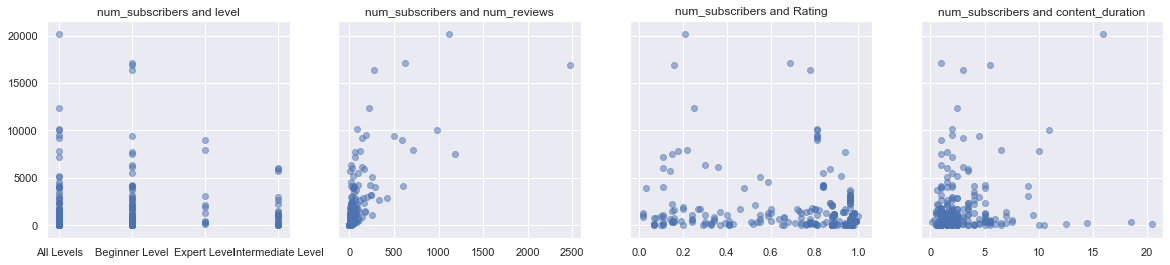

In [111]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(20,4))
ax1.scatter(udemi_trading['level'],udemi_trading['num_subscribers'],alpha=0.5)
ax1.set_title('num_subscribers and level')
ax2.scatter(udemi_trading['num_reviews'],udemi_trading['num_subscribers'],alpha=0.5)
ax2.set_title('num_subscribers and num_reviews')
ax3.scatter(udemi_trading['Rating'],udemi_trading['num_subscribers'],alpha=0.5)
ax3.set_title('num_subscribers and Rating')
ax4.scatter(udemi_trading['content_duration'],udemi_trading['num_subscribers'],alpha=0.5)
ax4.set_title('num_subscribers and content_duration')

plt.show()

In [47]:
mean_duration=2.8
Duration=np.where(udemi_trading['content_duration']>mean_duration, 'Long','Short')
udemi_trading['Duration']=Duration

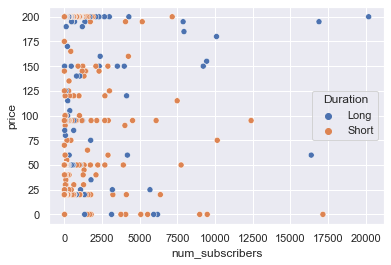

In [48]:
sns.scatterplot(y=udemi_trading['price'], x=udemi_trading['num_subscribers'], hue=udemi_trading['Duration'])

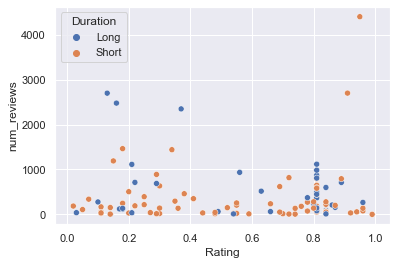

In [49]:
sns.scatterplot(y=udemi_tops['num_reviews'], x=udemi_tops['Rating'], hue=udemi_tops['Duration'])

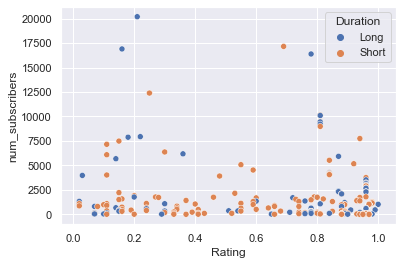

In [50]:
sns.scatterplot(x=udemi_trading['Rating'], y=udemi_trading['num_subscribers'], hue=udemi_trading['Duration'])

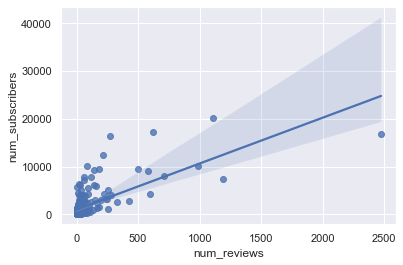

In [51]:
sns.regplot(x=udemi_trading['num_reviews'], y=udemi_trading['num_subscribers'])